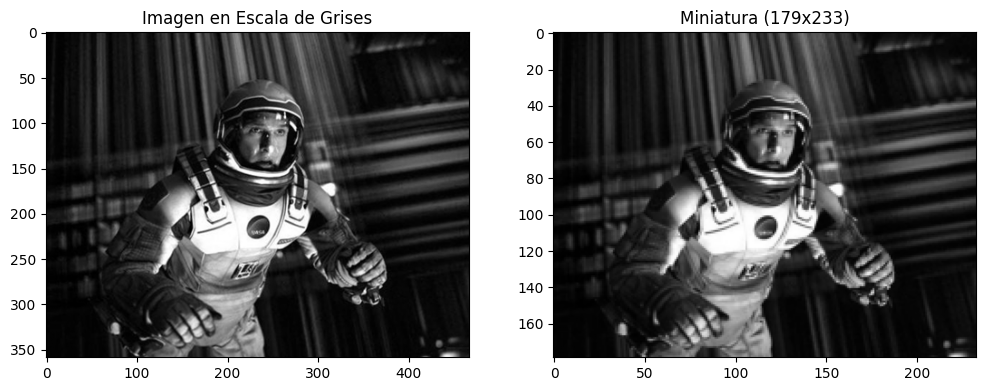

Dimensiones de la miniatura: (179, 233)
Tamaño del vector: (41707,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = plt.imread('input.png')

# Convertir a escala de grises con operaciones de álgebra lineal
if image.ndim == 3:
    # Normalizar valores si la imagen está en formato entero (0-255)
    if np.issubdtype(image.dtype, np.integer):
        red = image[:, :, 0].astype(float) / 255.0
        green = image[:, :, 1].astype(float) / 255.0
        blue = image[:, :, 2].astype(float) / 255.0
    else:
        red, green, blue = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    
    gray_image = 0.2989 * red + 0.5870 * green + 0.1140 * blue
else:
    gray_image = image.astype(float)
    if np.issubdtype(image.dtype, np.integer):
        gray_image = gray_image / 255.0

# Definir el tamaño del bloque para la miniatura
block_size = 2

# Ajustar dimensiones para que sean divisibles por block_size
H, W = gray_image.shape
H_new = H - H % block_size
W_new = W - W % block_size
cropped_image = gray_image[:H_new, :W_new]

# Dividir en bloques y calcular promedios
blocks = cropped_image.reshape(H_new // block_size, block_size, W_new // block_size, block_size)
blocks = blocks.transpose(0, 2, 1, 3)  # Reorganizar para agrupar bloques
thumbnail = blocks.mean(axis=(2, 3))   # Promedio sobre los bloques

# Vectorizar la miniatura
thumbnail_vector = thumbnail.flatten()

# Visualización
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Imagen en Escala de Grises')
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=1)

plt.subplot(1, 2, 2)
plt.title(f'Miniatura ({thumbnail.shape[0]}x{thumbnail.shape[1]})')
plt.imshow(thumbnail, cmap='gray', vmin=0, vmax=1)

plt.show()

print("Dimensiones de la miniatura:", thumbnail.shape)
print("Tamaño del vector:", thumbnail_vector.shape)

Aquí tienes las celdas markdown explicativas para el notebook:

---

### **1. Conversión a Escala de Grises**
La imagen original en color (RGB) se convierte a escala de grises usando una combinación lineal de los canales de color. La fórmula utilizada es:

\[
I_{\text{gray}} = 0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B
\]

**Fundamento**:
- Los coeficientes ponderados reflejan la sensibilidad del ojo humano a cada color (mayor peso en el verde).
- Se normalizan los valores de los píxeles al rango [0, 1] si la imagen está en formato entero (0-255).

---

### **2. Generación de la Miniatura por Promediado de Bloques**
Se reduce la dimensión de la imagen mediante promediado de bloques:

**Pasos**:
1. **Recorte de la imagen**:  
   Ajustamos las dimensiones para que sean divisibles por el tamaño del bloque \( b \times b \):
   \[
   H_{\text{new}} = H - (H \mod b), \quad W_{\text{new}} = W - (W \mod b)
   \]

2. **División en bloques**:  
   Reorganizamos la matriz en una estructura de 4 dimensiones:
   \[
   \text{blocks} = \text{imagen\_recortada.reshape}\left(\frac{H_{\text{new}}}{b}, b, \frac{W_{\text{new}}}{b}, b\right)
   \]
   Luego, se transpone para agrupar bloques:
   \[
   \text{blocks} = \text{blocks.transpose}(0, 2, 1, 3)
   \]

3. **Promediado**:  
   Calculamos la media en cada bloque:
   \[
   \text{thumbnail}[i,j] = \frac{1}{b^2} \sum_{x=0}^{b-1} \sum_{y=0}^{b-1} \text{blocks}[i,j,x,y]
   \]



### **3. Vectorización de la Miniatura**
La matriz 2D de la miniatura se convierte en un vector 1D usando `flatten()`:

$$
\text{vector} = \text{thumbnail.flatten()}
$$

**Resultado**:  
Un vector de longitud $ N = \frac{H_{\text{new}} \cdot W_{\text{new}}}{b^2} $, donde cada elemento representa el valor promedio de un bloque.

